In [1]:
!wandb login

wandb: Currently logged in as: dorzhey (umich_med). Use `wandb login --relogin` to force relogin


In [2]:
import matplotlib.pyplot as plt
import os

file_dir = os.path.abspath('')
data_dir = os.path.join(file_dir, '..','data_preprocessing','generated_data')
save_dir =  os.path.join(file_dir,'train_output')

In [3]:
import pandas as pd
import wandb

api = wandb.Api()
run = api.run("umich_med/dnadiffusion/f7vdxo8s")

In [27]:
df = run.history()
df.drop(columns=['Generated_Train_js_heatmap','Test_Train_js_heatmap'], inplace=True)
df

,loss,_timestamp,edit_distance,min_edit_distance_by_cell_type,shuffle_js_by_cell_type,train_js,gc_ratio_by_cell_type,test_js,shuffle_js,test_js_by_cell_type,_step,_runtime,gc_ratio,train_js_by_cell_type,seq_similarity
0,NaN,1.721170e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.278567,NaN,NaN,NaN
1,0.040902,1.721173e+09,87.802143,89.060875,0.250353,0.247480,1.122396,0.251607,0.230514,0.295778,50,2695.498964,1.133016,0.288837,0.405400
2,0.036204,1.721175e+09,89.809286,90.590693,0.235580,0.182129,1.039814,0.179496,0.186438,0.242019,100,5266.443876,1.026450,0.240606,0.396129
3,0.034218,1.721178e+09,89.853214,90.882990,0.215217,0.157242,1.035960,0.161677,0.175699,0.223346,150,7905.172209,1.032495,0.218684,0.401809
4,0.037126,1.721181e+09,89.536071,89.980357,0.235013,0.163127,1.049203,0.162980,0.190609,0.230441,200,10530.020775,1.023286,0.225676,0.401809
5,0.037302,1.721183e+09,86.898929,87.775903,0.301292,0.177321,1.126992,0.184489,0.244199,0.223648,250,13282.371687,1.125547,0.206062,0.409304
6,0.035562,1.721186e+09,88.323214,89.172619,0.291229,0.132178,1.057490,0.138328,0.221170,0.184819,300,16006.290119,1.044930,0.170160,0.409304
7,0.037353,1.721189e+09,87.833571,88.911478,0.280371,0.127944,1.078382,0.149242,0.208295,0.180143,350,18636.366574,1.086513,0.154866,0.403221
8,0.038873,1.721191e+09,87.452500,88.440490,0.302449,0.135011,1.097703,0.150867,0.237329,0.169223,400,21266.189577,1.101468,0.150712,0.403221
9,0.034918,1.721194e+09,88.852143,89.383207,0.294655,0.126472,1.054036,0.130801,0.222163,0.172898,450,23899.432265,1.032759,0.162950,0.401293


In [28]:
#filter out values of 1 in jsd metrics
df = df[df._step < 1300]
js_df = df[[x for x in df.columns if 'js' in x]]
# js_df.where(js_df < 0.4, None, inplace=True)
# js_df.fillna(method='ffill',axis=0,inplace=True)
#js_df = js_df.replace(1,None)

In [29]:
js_df

,shuffle_js_by_cell_type,train_js,test_js,shuffle_js,test_js_by_cell_type,train_js_by_cell_type
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.250353,0.247480,0.251607,0.230514,0.295778,0.288837
2,0.235580,0.182129,0.179496,0.186438,0.242019,0.240606
3,0.215217,0.157242,0.161677,0.175699,0.223346,0.218684
4,0.235013,0.163127,0.162980,0.190609,0.230441,0.225676
5,0.301292,0.177321,0.184489,0.244199,0.223648,0.206062
6,0.291229,0.132178,0.138328,0.221170,0.184819,0.170160
7,0.280371,0.127944,0.149242,0.208295,0.180143,0.154866
8,0.302449,0.135011,0.150867,0.237329,0.169223,0.150712
9,0.294655,0.126472,0.130801,0.222163,0.172898,0.162950


In [30]:
def plot_training_validation(values_list, y_labels, X, per_epoch, save_dir, df, specific_name):
    plt.figure()
    for idx, values in enumerate(values_list):
        plt.plot(X, df[values], label=y_labels[idx])
    
    plt.title(f"Validation stats every {per_epoch} epoch  \n {specific_name}")
    plt.xlabel("epoch")
    plt.legend()
    plt.savefig(f"{save_dir}/validation_training.png")

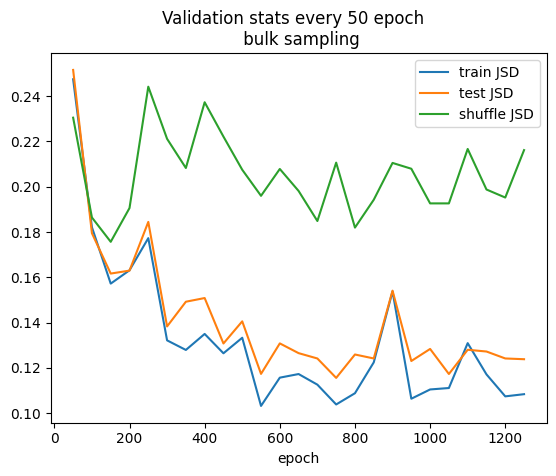

In [33]:
validations = ['train_js', 'test_js', 'shuffle_js']
labels = ["train JSD", "test JSD", "shuffle JSD"]
plot_training_validation(validations, labels, df['_step'], 50, save_dir, js_df, "bulk sampling")

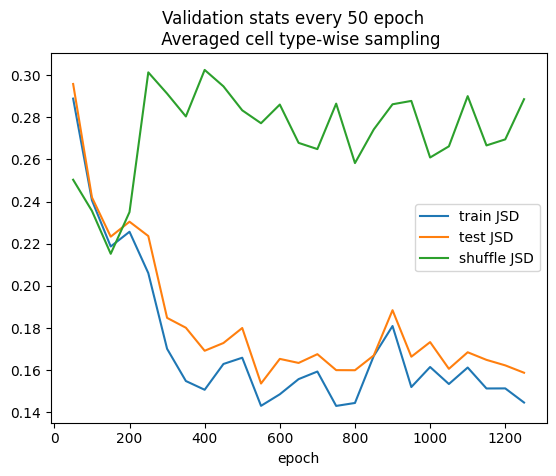

In [34]:
validations = ['train_js_by_cell_type', 'test_js_by_cell_type', 'shuffle_js_by_cell_type']
labels = ["train JSD", "test JSD", "shuffle JSD"]
plot_training_validation(validations, labels, df['_step'], 50, save_dir, js_df, "Averaged cell type-wise sampling")

In [70]:
metrics_df = df[[x for x in df.columns if 'js' not in x]]
metrics_df

,loss,distance_from_closest_by_cell_type,_timestamp,knn_distance_by_cell_type,gc_ratio,knn_distance,edit_distance,_step,distance_endogenous,gc_ratio_by_cell_type,_runtime,seq_similarity,min_edit_distance_by_cell_type
0,15.412688,NaN,1.720035e+09,NaN,NaN,NaN,NaN,0,NaN,NaN,19.110600,NaN,NaN
1,1.718999,0.034977,1.720037e+09,0.038561,0.998835,0.035092,92.412500,200,0.032038,0.998891,1519.498615,0.395923,93.365343
2,1.956811,0.034680,1.720038e+09,0.038232,0.974876,0.034785,93.060714,400,0.031759,0.974807,2993.115754,0.392616,94.016611
3,1.632069,0.034995,1.720040e+09,0.038665,0.982356,0.034957,91.971429,600,0.031790,0.984010,4470.383967,0.397480,92.998929
4,1.549395,0.033365,1.720041e+09,0.036729,0.942159,0.033451,93.716429,800,0.030565,0.940882,5878.765510,0.400803,94.801485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.678657,0.035693,1.720453e+09,0.040000,0.950741,0.035986,90.472500,56800,0.032297,0.953564,418257.285851,0.402691,91.618494
285,1.522539,0.035704,1.720455e+09,0.040018,0.976244,0.036342,89.746786,57000,0.032710,0.974034,419721.730408,0.406604,90.994272
286,1.608151,0.037581,1.720456e+09,0.042195,1.009928,0.037759,88.856071,57200,0.033913,1.015050,421182.129873,0.410289,89.678298
287,1.176302,0.038225,1.720458e+09,0.042699,1.035223,0.038852,88.661071,57400,0.035039,1.029847,422644.603680,0.412825,89.805658


In [71]:
def plot_training_loss(values, save_dir):
    plt.figure()
    plt.plot(values)
    plt.title(f"Training process \n MSE Loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.savefig(f"{save_dir}/loss_training.png")

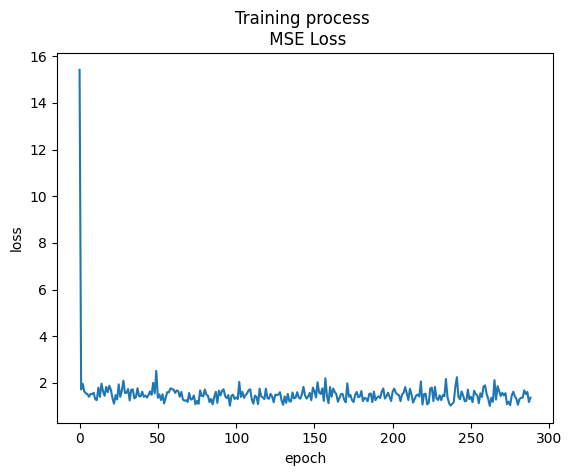

In [72]:
plot_training_loss(metrics_df['loss'], save_dir)

In [73]:
steps =metrics_df['_step']
metrics_df = metrics_df.drop(['loss','_timestamp','_runtime','_step'], axis=1)
metrics_df

,distance_from_closest_by_cell_type,knn_distance_by_cell_type,gc_ratio,knn_distance,edit_distance,distance_endogenous,gc_ratio_by_cell_type,seq_similarity,min_edit_distance_by_cell_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.034977,0.038561,0.998835,0.035092,92.412500,0.032038,0.998891,0.395923,93.365343
2,0.034680,0.038232,0.974876,0.034785,93.060714,0.031759,0.974807,0.392616,94.016611
3,0.034995,0.038665,0.982356,0.034957,91.971429,0.031790,0.984010,0.397480,92.998929
4,0.033365,0.036729,0.942159,0.033451,93.716429,0.030565,0.940882,0.400803,94.801485
...,...,...,...,...,...,...,...,...,...
284,0.035693,0.040000,0.950741,0.035986,90.472500,0.032297,0.953564,0.402691,91.618494
285,0.035704,0.040018,0.976244,0.036342,89.746786,0.032710,0.974034,0.406604,90.994272
286,0.037581,0.042195,1.009928,0.037759,88.856071,0.033913,1.015050,0.410289,89.678298
287,0.038225,0.042699,1.035223,0.038852,88.661071,0.035039,1.029847,0.412825,89.805658


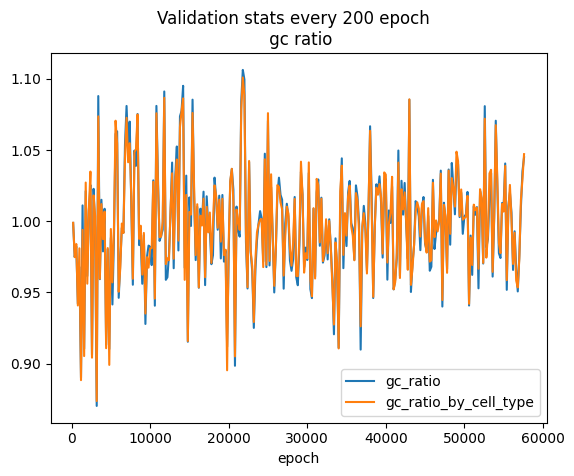

In [84]:
values = ['gc_ratio', 'gc_ratio_by_cell_type']
plot_training_validation(values, values, steps, 200, save_dir, metrics_df, "gc ratio")

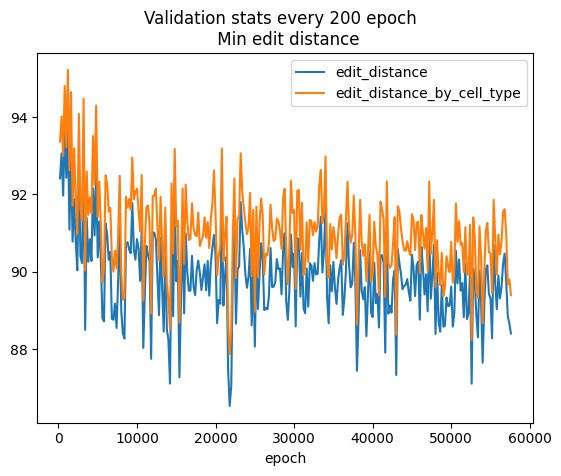

In [86]:
values = ['edit_distance', 'min_edit_distance_by_cell_type']
labels = ['edit_distance', 'edit_distance_by_cell_type']
plot_training_validation(values, labels, steps, 200, save_dir, metrics_df, "Min edit distance")

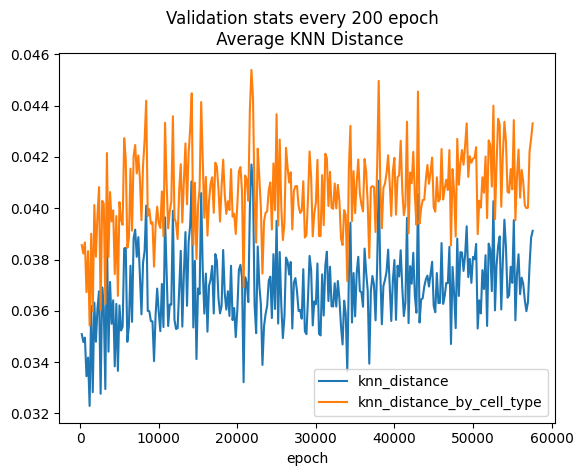

In [87]:
values = ['knn_distance', 'knn_distance_by_cell_type']
labels = ['knn_distance', 'knn_distance_by_cell_type']
plot_training_validation(values, labels, steps, 200, save_dir, metrics_df, "Average KNN Distance")

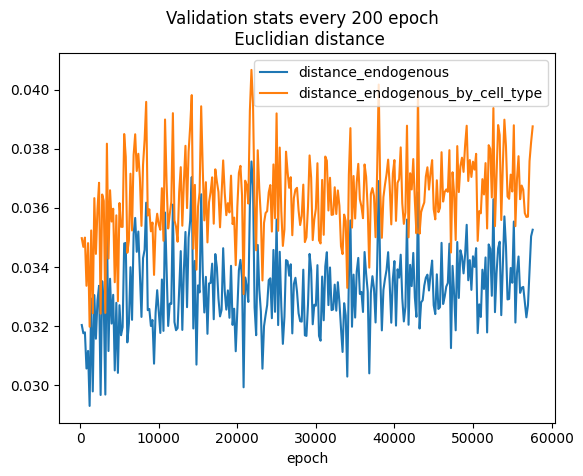

In [88]:
values = ['distance_endogenous', 'distance_from_closest_by_cell_type']
labels = ['distance_endogenous', 'distance_endogenous_by_cell_type']
plot_training_validation(values, labels, steps, 200, save_dir, metrics_df, "Euclidian distance")